In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import ShuffleSplit
import matplotlib.pyplot as plt

# k-Nearest Neighbors

In [2]:
## create a function: y=0.5*np.sin(x1)+ 0.5*np.cos(x2)+0.1*x1+3
## x1 (0~50)，x2(-10~10)
## x1, x2 have 500 train, 100 test.
## 在训练集的上加了一个-0.5~0.5的噪声.

def f(x1, x2):
    y = 0.5 * np.sin(x1) + 0.5 * np.cos(x2)  + 0.1 * x1 + 3 
    return y

def load_data():
    x1_train = np.linspace(0,50,500)
    x2_train = np.linspace(-10,10,500)
    data_train = np.array([[x1,x2,f(x1,x2) + (np.random.random(1)-0.5)] for x1,x2 in zip(x1_train, x2_train)])
    x1_test = np.linspace(0,50,100)+ 0.5 * np.random.random(100)
    x2_test = np.linspace(-10,10,100) + 0.02 * np.random.random(100)
    data_test = np.array([[x1,x2,f(x1,x2)] for x1,x2 in zip(x1_test, x2_test)])
    return data_train, data_test

In [3]:
def try_different_method(clf):
    clf.fit(x_train,y_train)
    score = clf.score(x_test, y_test)
    result = clf.predict(x_test)
    plt.figure()
    plt.plot(np.arange(len(result)), y_test,'go-',label='true value')
    plt.plot(np.arange(len(result)),result,'ro-',label='predict value')
    plt.title('score: %f'%score)
    plt.legend()
    plt.show()

In [4]:
train, test = load_data()
x_train, y_train = train[:,:2], train[:,2] #数据前两列是x1,x2 第三列是y,这里的y有随机噪声
x_test ,y_test = test[:,:2], test[:,2] # 同上,不过这里的y没有噪声


## Compare with kNN and Linear 

In [5]:
# knn regression
from sklearn import neighbors

In [6]:
knn = neighbors.KNeighborsRegressor(n_neighbors=5)

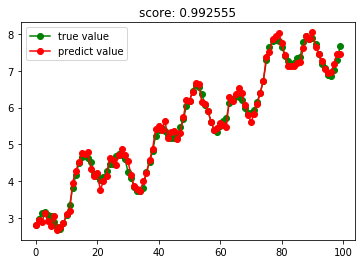

In [7]:
try_different_method(knn)

In [8]:
def display_scores(scores):
    print("Scores:", scores)
    print("Mean:", scores.mean())
    print("Standard deviation:", scores.std())

In [9]:
# knn regression - scores: mean & std
from sklearn.model_selection import cross_val_score
knn_scores = cross_val_score(knn, x_test, y_test,
                             scoring="neg_mean_squared_error", cv=10)
knn_rmse_scores = np.sqrt(-knn_scores)
display_scores(knn_rmse_scores)

Scores: [0.84644212 0.77414693 0.54030157 0.85259224 0.74133133 0.68737738
 0.35688584 0.37257668 0.41588279 0.4996739 ]
Mean: 0.6087210765541743
Standard deviation: 0.1844089822259378


In [ ]:
# we will compare bias and var when we change the k. 

In [10]:
# knn2---increase k 

knn2 = neighbors.KNeighborsRegressor(n_neighbors=90)

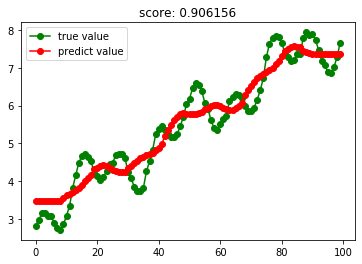

In [11]:
try_different_method(knn2)

In [12]:
# knn2 regression - scores: mean & std
from sklearn.model_selection import cross_val_score
knn2_scores = cross_val_score(knn2, x_test, y_test,
                             scoring="neg_mean_squared_error", cv=10)
knn2_rmse_scores = np.sqrt(-knn2_scores)
display_scores(knn2_rmse_scores)

Scores: [2.83624452 1.57796776 1.22133973 1.48275983 0.2679423  0.75842285
 0.60718147 1.78160201 2.24567293 2.03934308]
Mean: 1.4818476473437527
Standard deviation: 0.7521654486703829


In [13]:
# knn3---decrease k
knn3 = neighbors.KNeighborsRegressor(n_neighbors=1)

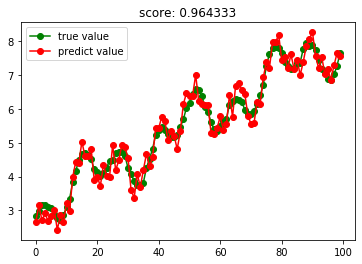

In [14]:
try_different_method(knn3)

In [15]:
# knn3 regression - scores: mean & std
from sklearn.model_selection import cross_val_score
knn3_scores = cross_val_score(knn3, x_test, y_test,
                             scoring="neg_mean_squared_error", cv=10)
knn3_rmse_scores = np.sqrt(-knn3_scores)
display_scores(knn3_rmse_scores)

Scores: [0.20521614 0.80791765 0.30743722 0.85114363 0.52939465 0.38143653
 0.46988103 0.36578794 0.42203943 0.66006763]
Mean: 0.5000321858211572
Standard deviation: 0.20189946275646725


In [ ]:
# conclusion:

#When k increase, the model become more simple, so the bias be increased, variance be decresed.
#When k decrease, the model become more complex, so the bias be decreased, variance be increased. 

In [ ]:
# knn regression - MSE
from sklearn.metrics import mean_squared_error
y_pred = knn.predict(x_test)
knn_mse = mean_squared_error(y_test, y_pred)
knn_mse

In [ ]:
# knn regression - MAE
from sklearn.metrics import mean_absolute_error
knn_mae = mean_absolute_error(y_test, y_pred)
knn_mae

In [ ]:
# linear regression
from sklearn import linear_model
linear_reg = linear_model.LinearRegression()
try_different_method(linear_reg)

In [ ]:
# linear regression - MSE
y_pred2 = linear_reg.predict(x_test)
lin_mse = mean_squared_error(y_test, y_pred2)
lin_mse

In [ ]:
# linear regression - MAE
lin_mae = mean_absolute_error(y_test, y_pred2)
lin_mae

In [ ]:
# linear regression scores: mean & std
lin_scores = cross_val_score(linear_reg, x_test, y_test,
                             scoring="neg_mean_squared_error", cv=10)
lin_rmse_scores = np.sqrt(-lin_scores)
display_scores(lin_rmse_scores)

## Load Data

# Advanced Technique in Regression

## Gradient Descent 

## Coordinated Descent

## Stochastic Gradient Descent

# Regularization

## grid search

# RANSAC